In [120]:
%load_ext cudf.pandas

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


## Loading and Transforming Data

Run once, transforms dataset for graph learning

In [121]:
output_path = "data/sensor_df.pkl"

In [122]:
# # Run once, do not delete!
# from utilities import SensorCyclePipeline

# input_path = "data/sensor.csv"

# pipeline = SensorCyclePipeline(input_path, output_path)
# pipeline.run()

In [123]:
import pandas as pd
df_sensor_raw = pd.read_pickle(output_path)
# Temporary
# df_sensor_temp = df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
#                            'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
#                             #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
#                                ]].copy()
df_sensor_temp = df_sensor_raw.copy()

df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
               'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
                     #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
              ]].copy()

,timestamp,CycleID,machine_status,sensor_00_value_decimals,sensor_00_value,sensor_00_value_exp_weighted_mean_span10000,sensor_00_value_exp_weighted_std_span10000,sensor_00_value_zscore_span10000
0,2018-04-01 00:00:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
1,2018-04-01 00:01:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
2,2018-04-01 00:02:00,0,NORMAL,6.0,2.444734,NaN,NaN,NaN
3,2018-04-01 00:03:00,0,NORMAL,6.0,2.460474,NaN,NaN,NaN
4,2018-04-01 00:04:00,0,NORMAL,6.0,2.445718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,21,NORMAL,5.0,2.407350,2.437010,0.047856,-0.619769
220316,2018-08-31 23:56:00,21,NORMAL,6.0,2.400463,2.437002,0.047854,-0.763558
220317,2018-08-31 23:57:00,21,NORMAL,6.0,2.396528,2.436994,0.047853,-0.845642
220318,2018-08-31 23:58:00,21,NORMAL,6.0,2.406366,2.436988,0.047850,-0.639963


In [124]:
cycle_stats = df_sensor_raw.groupby('CycleID').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max'),
    duration_min=('timestamp', lambda x: (x.max() - x.min()).total_seconds() / 60),
    count=('timestamp', 'count'),
    status=('machine_status', 'first')
).reset_index()

# Save separately
cycle_stats.to_pickle("cycle_stats.pkl")

In [125]:
cycle_stats

,CycleID,start_time,end_time,duration_min,count,status
0,0,2018-04-01 00:00:00,2018-04-12 21:54:00,17154.0,17155,NORMAL
1,1,2018-04-12 21:55:00,2018-04-12 21:55:00,0.0,1,BROKEN
2,2,2018-04-12 21:56:00,2018-04-13 13:39:00,943.0,944,RECOVERING
3,3,2018-04-13 13:40:00,2018-04-18 00:29:00,6409.0,6410,NORMAL
4,4,2018-04-18 00:30:00,2018-04-18 00:30:00,0.0,1,BROKEN
5,5,2018-04-18 00:31:00,2018-04-20 04:20:00,3109.0,3110,RECOVERING
6,6,2018-04-20 04:21:00,2018-05-19 03:17:00,41696.0,41697,NORMAL
7,7,2018-05-19 03:18:00,2018-05-19 03:18:00,0.0,1,BROKEN
8,8,2018-05-19 03:19:00,2018-05-20 01:10:00,1311.0,1312,RECOVERING
9,9,2018-05-20 01:11:00,2018-05-25 00:29:00,7158.0,7159,NORMAL


In [126]:
mask_cycleids = cycle_stats[cycle_stats['status'] == 'BROKEN']['CycleID'].tolist()
print(f'"BROKEN" CycleIDs:{mask_cycleids})')
df_sensor_temp = df_sensor_temp[~df_sensor_temp['CycleID'].isin(mask_cycleids)]

# Merge end_time into df_sensor_temp and create df_sensor_temp2
df_sensor_temp2 = pd.merge(df_sensor_temp,
                           cycle_stats[['CycleID', 'end_time']],
                           on='CycleID',
                           how='left')

# Convert to datetime
df_sensor_temp2['timestamp'] = pd.to_datetime(df_sensor_temp2['timestamp'])
df_sensor_temp2['end_time'] = pd.to_datetime(df_sensor_temp2['end_time'])

# Add 1 minute to end_time
df_sensor_temp2['end_time_plus_1min'] = df_sensor_temp2['end_time'] + pd.Timedelta(minutes=1)

# Calculate time difference in minutes until state change
df_sensor_temp2['time_to_state_change_min'] = (
    df_sensor_temp2['end_time_plus_1min'] - df_sensor_temp2['timestamp']
).dt.total_seconds() / 60

# Drop the helper column if you want
df_sensor_temp2 = df_sensor_temp2.drop(columns=['end_time', 'end_time_plus_1min'])

df_sensor = df_sensor_temp2.copy()

"BROKEN" CycleIDs:[1, 4, 7, 10, 13, 16, 19])


In [127]:
df_sensor

,timestamp,sensor_00_value,sensor_01_value,sensor_02_value,sensor_03_value,sensor_04_value,sensor_05_value,sensor_06_value,sensor_07_value,sensor_08_value,...,sensor_43_value_zscore_span10000,sensor_44_value_zscore_span10000,sensor_45_value_zscore_span10000,sensor_46_value_zscore_span10000,sensor_47_value_zscore_span10000,sensor_48_value_zscore_span10000,sensor_49_value_zscore_span10000,sensor_50_value_zscore_span10000,sensor_51_value_zscore_span10000,time_to_state_change_min
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17155.0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17154.0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17153.0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17152.0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,-0.959677,0.705336,-0.182574,-0.641104,-0.371023,-1.150948,1.663453,NaN,0.422608,5.0
220309,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,-0.959493,0.622401,-0.267563,-0.660588,-0.404368,-1.126177,1.734143,NaN,0.422558,4.0
220310,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,-0.812938,0.539477,-0.352550,-0.660493,-0.404321,-1.067111,1.709681,NaN,0.457591,3.0
220311,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,-0.520024,0.473131,-0.409191,-0.640822,-0.437667,-0.978661,1.669408,NaN,0.539395,2.0


In [128]:
print(list(df_sensor.columns))

['timestamp', 'sensor_00_value', 'sensor_01_value', 'sensor_02_value', 'sensor_03_value', 'sensor_04_value', 'sensor_05_value', 'sensor_06_value', 'sensor_07_value', 'sensor_08_value', 'sensor_09_value', 'sensor_10_value', 'sensor_11_value', 'sensor_12_value', 'sensor_13_value', 'sensor_14_value', 'sensor_16_value', 'sensor_17_value', 'sensor_18_value', 'sensor_19_value', 'sensor_20_value', 'sensor_21_value', 'sensor_22_value', 'sensor_23_value', 'sensor_24_value', 'sensor_25_value', 'sensor_26_value', 'sensor_27_value', 'sensor_28_value', 'sensor_29_value', 'sensor_30_value', 'sensor_31_value', 'sensor_32_value', 'sensor_33_value', 'sensor_34_value', 'sensor_35_value', 'sensor_36_value', 'sensor_37_value', 'sensor_38_value', 'sensor_39_value', 'sensor_40_value', 'sensor_41_value', 'sensor_42_value', 'sensor_43_value', 'sensor_44_value', 'sensor_45_value', 'sensor_46_value', 'sensor_47_value', 'sensor_48_value', 'sensor_49_value', 'sensor_50_value', 'sensor_51_value', 'machine_status',

## Graph Construction

In [129]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# THRESHOLD_CORR = 0.6

# # filter rows from specific cycles
# filtered = df_sensor[df_sensor['CycleID'].isin([0, 2])]

# # select only sensor columns ending with '_value'
# sensor_cols = [col for col in df_sensor.columns if col.startswith('sensor_') and col.endswith('_value')]
# sensor_data = filtered[sensor_cols]

# # compute Spearman correlation matrix
# corr_matrix, _ = spearmanr(sensor_data, axis=0)

# # build graph from correlation matrix
# G = nx.Graph()
# for i, col_i in enumerate(sensor_cols):
#     node_i = col_i.replace("_value", "")
#     G.add_node(node_i)
#     for j in range(i + 1, len(sensor_cols)):
#         corr = corr_matrix[i, j]
#         if abs(corr) > THRESHOLD_CORR:
#             node_j = sensor_cols[j].replace("_value", "")
#             G.add_edge(node_i, node_j, weight=corr)

# # visualize graph
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# weights = [abs(G[u][v]['weight']) * 4 for u, v in G.edges()]

# nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
# nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=600)
# nx.draw_networkx_labels(G, pos, font_size=9)

# plt.title(f"Graph Construction: Sensor Spearman Correlation (|r| > {THRESHOLD_CORR})")
# plt.axis('off')
# plt.tight_layout()
# plt.show()


In [130]:
# import matplotlib.pyplot as plt

# # Use modularity-based clustering
# from networkx.algorithms.community import greedy_modularity_communities

# clusters = list(greedy_modularity_communities(G))

# # Assign a color per cluster
# color_map = {}
# for i, cluster in enumerate(clusters):
#     for node in cluster:
#         color_map[node] = i

# node_colors = [color_map[node] for node in G.nodes()]

# # Draw
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, node_size=600, edge_color='gray')
# plt.title("Sensor Correlation Network with Clusters (greedy_modularity_communities)")
# plt.axis('off')
# plt.show()


In [131]:
# import matplotlib.pyplot as plt
# import networkx as nx
# from networkx.algorithms.community import label_propagation_communities

# # Use label propagation clustering
# clusters = list(label_propagation_communities(G))

# # Assign a color per cluster
# color_map = {}
# for i, cluster in enumerate(clusters):
#     for node in cluster:
#         color_map[node] = i

# node_colors = [color_map[node] for node in G.nodes()]

# # Draw
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, node_size=600, edge_color='gray')
# plt.title("Sensor Correlation Network with Clusters (label_propagation_communities)")
# plt.axis('off')
# plt.show()


In [132]:
# clusters

[['sensor_00'],
 ['sensor_01'],
 ['sensor_02', 'sensor_44', 'sensor_03'],
 ['sensor_40',
  'sensor_43',
  'sensor_47',
  'sensor_41',
  'sensor_38',
  'sensor_42',
  'sensor_39',
  'sensor_37'],
 ['sensor_04'],
 ['sensor_05'],
 ['sensor_06'],
 ['sensor_07'],
 ['sensor_08'],
 ['sensor_09'],
 ['sensor_10'],
 ['sensor_11'],
 ['sensor_12'],
 ['sensor_13'],
 ['sensor_16',
  'sensor_24',
  'sensor_21',
  'sensor_17',
  'sensor_19',
  'sensor_14',
  'sensor_26',
  'sensor_25',
  'sensor_18',
  'sensor_20'],
 ['sensor_22'],
 ['sensor_23'],
 ['sensor_28', 'sensor_27'],
 ['sensor_32', 'sensor_36', 'sensor_31', 'sensor_33'],
 ['sensor_29'],
 ['sensor_30'],
 ['sensor_34', 'sensor_35'],
 ['sensor_45', 'sensor_46'],
 ['sensor_48', 'sensor_50', 'sensor_51', 'sensor_49']]

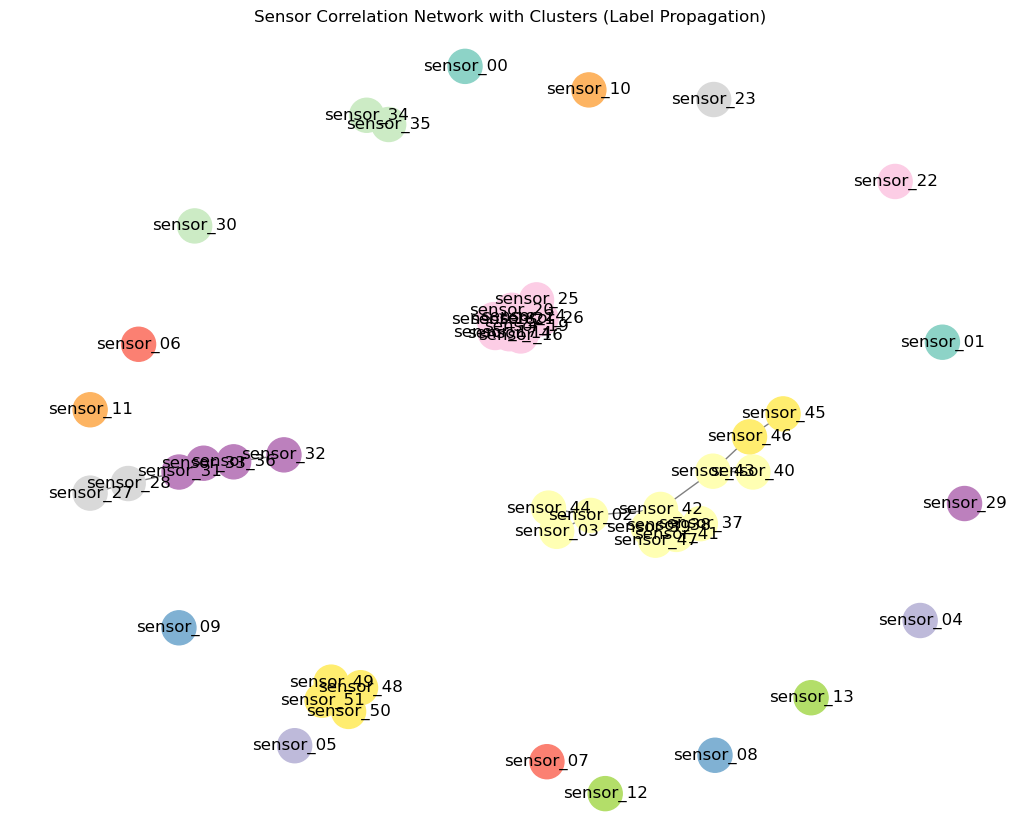

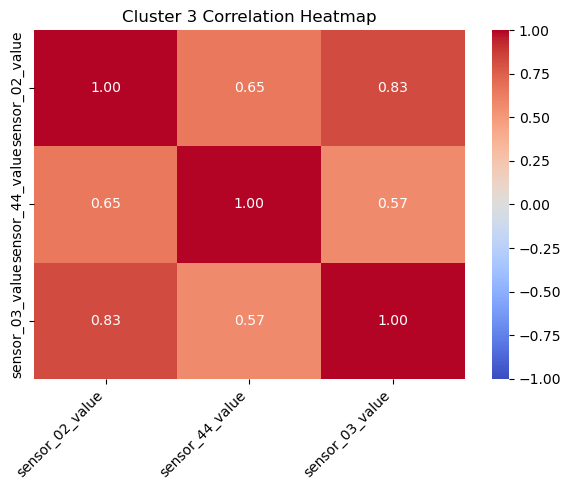

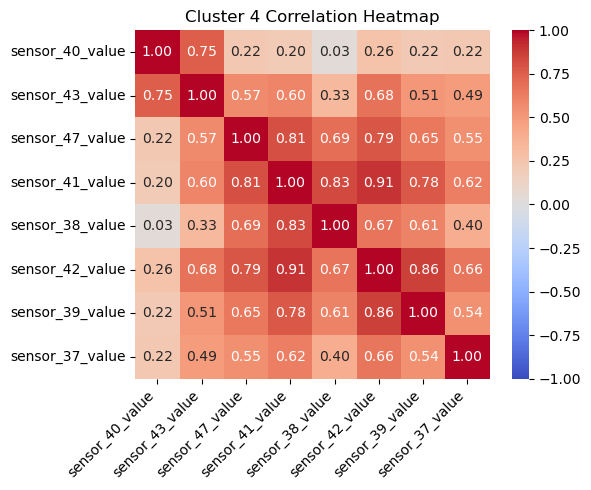

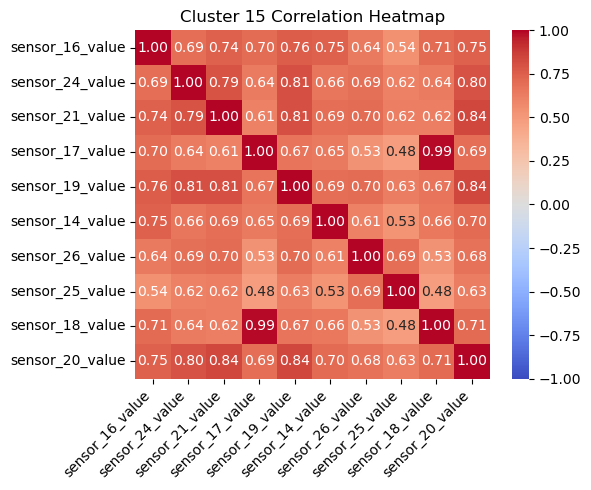

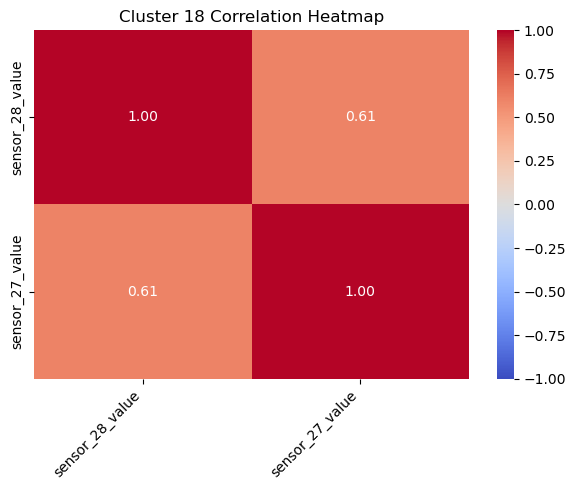

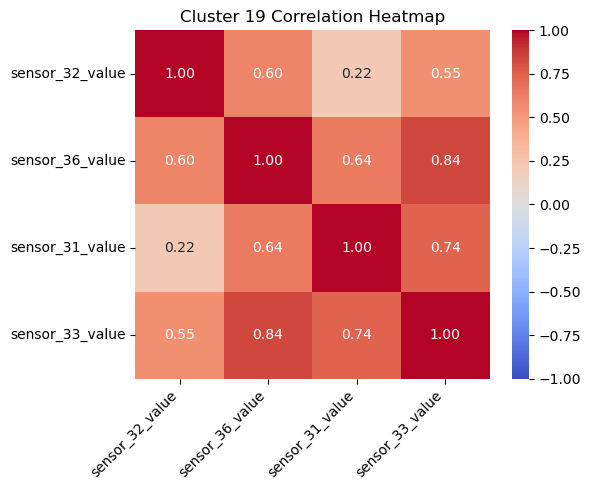

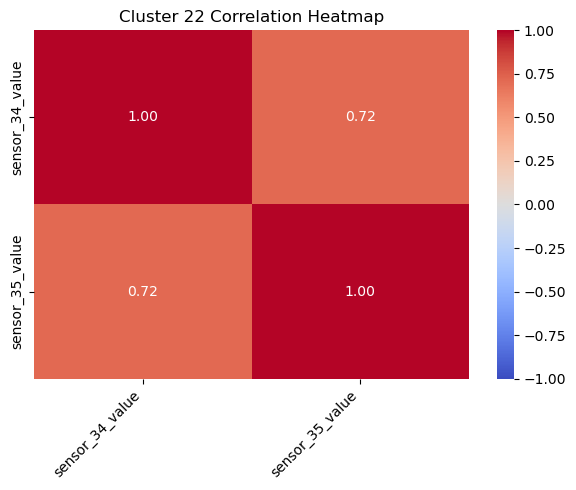

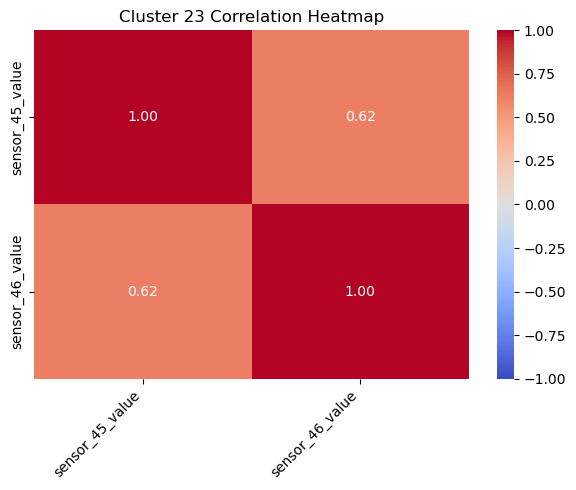

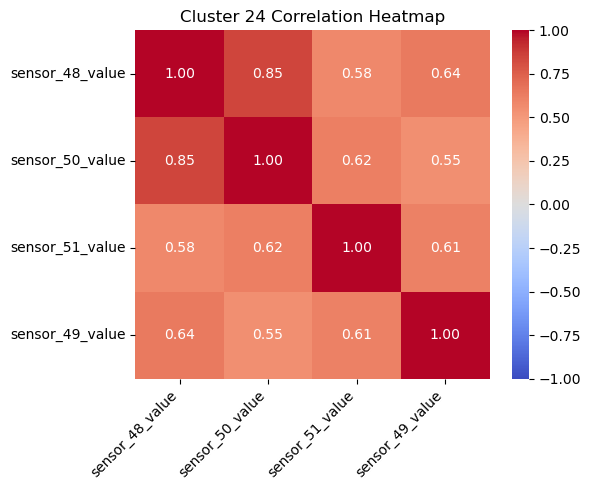

In [133]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import numpy as np
from networkx.algorithms.community import label_propagation_communities

THRESHOLD_CORR = 0.6

# filter rows from specific cycles
filtered = df_sensor[df_sensor['CycleID'].isin([0, 2])]

# select only sensor columns ending with '_value'
sensor_cols = [col for col in df_sensor.columns if col.startswith('sensor_') and col.endswith('_value')]
sensor_data = filtered[sensor_cols]

# compute Spearman correlation matrix
corr_matrix, _ = spearmanr(sensor_data, axis=0)

# build graph from correlation matrix
G = nx.Graph()
for i, col_i in enumerate(sensor_cols):
    node_i = col_i.replace("_value", "")
    G.add_node(node_i)
    for j in range(i + 1, len(sensor_cols)):
        corr = corr_matrix[i, j]
        if abs(corr) > THRESHOLD_CORR:
            node_j = sensor_cols[j].replace("_value", "")
            G.add_edge(node_i, node_j, weight=corr)

# ---- label propagation clustering ----
clusters = list(label_propagation_communities(G))
sensor_clusters = [list(cluster) for cluster in clusters]

display(sensor_clusters)

# Assign colors to clusters
color_map = {}
for i, cluster in enumerate(clusters):
    for node in cluster:
        color_map[node] = i
node_colors = [color_map[node] for node in G.nodes()]

# Visualize graph with colored clusters
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.Set3,
    node_size=600,
    edge_color='gray'
)
plt.title("Sensor Correlation Network with Clusters (Label Propagation)")
plt.axis('off')
plt.show()

# ---- Correlation heatmaps per cluster ----

# Build name→index map
name_to_idx = {col: i for i, col in enumerate(sensor_cols)}

for i, cluster in enumerate(sensor_clusters):
    if len(cluster) <= 1:
        continue  # skip singleton clusters

    # get full column names
    names = [f"{node}_value" for node in cluster]

    # get their indices in corr matrix
    idxs = [name_to_idx[name] for name in names]

    # extract correlation submatrix
    submat = corr_matrix[np.ix_(idxs, idxs)]

    # convert to numpy array
    data = np.array(submat, dtype=float)

    # plot heatmap
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(
        data,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt=".2f",
        vmin=-1, vmax=1,
        xticklabels=names,
        yticklabels=names
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"Cluster {i+1} Correlation Heatmap")
    plt.tight_layout()
    plt.show()


### What's next

Given that the sensors are clustered and the edges are weighted if they are greater than some threshold we can use this information for making less noisy graph of the signals in the system.

Likewise we can now have a way to label propagate and use those for clustering that eventually creates these super nodes that can be aggregated with information and likewise used in the graphs for every single graph!

So the supernodes will need to be created along with their edge weights to the related nodes, and then a system level node to represent the entire water ppump system and primary info


Hybrid Modeling Strategy: Use a binary classifier to detect if a machine is likely to change state within the next week (Stable vs. Unstable). 
- Only trigger a regression model when the classifier predicts Unstable, to estimate precise time-to-change. This reduces noise, avoids overfitting on irrelevant stable data, and focuses precision where it matters most.

The idea is to have a prescriptive analytics that can suggest how problematic the signals are acting. The classifier is very important. But the regression is also for how imminent!

In [134]:
print(list(df_sensor.columns()))

['timestamp', 'sensor_00_value', 'sensor_01_value', 'sensor_02_value', 'sensor_03_value', 'sensor_04_value', 'sensor_05_value', 'sensor_06_value', 'sensor_07_value', 'sensor_08_value', 'sensor_09_value', 'sensor_10_value', 'sensor_11_value', 'sensor_12_value', 'sensor_13_value', 'sensor_14_value', 'sensor_16_value', 'sensor_17_value', 'sensor_18_value', 'sensor_19_value', 'sensor_20_value', 'sensor_21_value', 'sensor_22_value', 'sensor_23_value', 'sensor_24_value', 'sensor_25_value', 'sensor_26_value', 'sensor_27_value', 'sensor_28_value', 'sensor_29_value', 'sensor_30_value', 'sensor_31_value', 'sensor_32_value', 'sensor_33_value', 'sensor_34_value', 'sensor_35_value', 'sensor_36_value', 'sensor_37_value', 'sensor_38_value', 'sensor_39_value', 'sensor_40_value', 'sensor_41_value', 'sensor_42_value', 'sensor_43_value', 'sensor_44_value', 'sensor_45_value', 'sensor_46_value', 'sensor_47_value', 'sensor_48_value', 'sensor_49_value', 'sensor_50_value', 'sensor_51_value', 'machine_status',

In [135]:
# feature suffixes to include
feature_suffixes = [
    '_value',
    '_value_zscore_span10000',
    '_value_exp_weighted_mean_span10000',
    '_value_exp_weighted_std_span10000',
    '_value_decimals',
]

# lists to track clusters
used_clusters = []
skipped_clusters = []

# iterate through clusters
for i, cluster in enumerate(sensor_clusters):
    if len(cluster) < 2:
        skipped_clusters.append(i)
        continue

    # check if any feature columns exist for the cluster
    has_features = any(
        any(f"{sensor}{suffix}" in df_sensor.columns for sensor in cluster)
        for suffix in feature_suffixes
    )

    if not has_features:
        skipped_clusters.append(i)
        continue

    # add aggregated features
    for suffix in feature_suffixes:
        feat_cols = [f"{sensor}{suffix}" for sensor in cluster if f"{sensor}{suffix}" in df_sensor.columns]

        if feat_cols:
            df_sensor[f"supernode_{i}{suffix}_mean"] = df_sensor[feat_cols].mean(axis=1)
            df_sensor[f"supernode_{i}{suffix}_std"] = df_sensor[feat_cols].std(axis=1, ddof=0)

    used_clusters.append(i)

# print summary
print("Used clusters:", used_clusters)
print("Skipped clusters:", skipped_clusters)


Used clusters: [2, 3, 14, 17, 18, 21, 22, 23]
Skipped clusters: [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20]


In [136]:
df_sensor

,timestamp,sensor_00_value,sensor_01_value,sensor_02_value,sensor_03_value,sensor_04_value,sensor_05_value,sensor_06_value,sensor_07_value,sensor_08_value,...,supernode_23_value_mean,supernode_23_value_std,supernode_23_value_zscore_span10000_mean,supernode_23_value_zscore_span10000_std,supernode_23_value_exp_weighted_mean_span10000_mean,supernode_23_value_exp_weighted_mean_span10000_std,supernode_23_value_exp_weighted_std_span10000_mean,supernode_23_value_exp_weighted_std_span10000_std,supernode_23_value_decimals_mean,supernode_23_value_decimals_std
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,167.534735,65.011520,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,167.534735,65.011520,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,167.028332,65.127741,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,166.594320,64.910137,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.000000,0.707107
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,167.100707,65.195568,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,199.074067,33.027553,0.31170437,1.151647727,198.0000118,78.15347897,40.07822785,14.21955388,4.000000,0.000000
220309,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,200.424367,32.030017,0.343507991,1.169057753,198.0004966,78.14334535,40.08052193,14.22037072,3.000000,0.816497
220310,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,201.581767,33.219101,0.366720463,1.135439886,198.0012128,78.13355224,40.08248449,14.22084742,4.000000,0.000000
220311,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,203.510800,35.372253,0.410046986,1.084931801,198.0023146,78.12429572,40.08399301,14.22082008,4.000000,0.000000


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def build_sensor_graph(
    df, 
    sensor_clusters, 
    color_map, 
    row_idx=None,
    feature_suffixes=[
        '_value',
        '_value_decimals',
        '_value_exp_weighted_mean_span10000',
        '_value_exp_weighted_std_span10000',
        '_value_zscore_span10000',
    ]
):
    """
    Build sensor graph for a given row.

    Returns the constructed NetworkX graph.
    """
    if row_idx is None:
        row_idx = len(df) // 2
    row = df.iloc[row_idx]

    G = nx.Graph()
    G.add_node("system", machine_status=row.get("machine_status", None))

    cluster_map = {}
    sensor_cols = [col for col in df.columns if col.startswith('sensor_') and col.endswith('_value')]
    all_sensors = [col.replace("_value", "") for col in sensor_cols]

    for i, cluster in enumerate(sensor_clusters):
        if len(cluster) < 2:
            continue

        supernode = f"supernode_{i}"
        G.add_node(supernode)
        G.add_edge("system", supernode)

        for sensor in cluster:
            attrs = {}
            for suffix in feature_suffixes:
                col_name = f"{sensor}{suffix}"
                attrs[suffix.strip('_')] = row.get(col_name, None)
            G.add_node(sensor, **attrs)
            G.add_edge(supernode, sensor)

        for suffix in feature_suffixes:
            vals = [row.get(f"{sensor}{suffix}") for sensor in cluster if f"{sensor}{suffix}" in row]
            mean_val = np.nanmean(vals) if vals else None
            G.nodes[supernode][f"mean{suffix}"] = mean_val

        G.nodes[supernode]["num_sensors"] = len(cluster)
        cluster_map.update({sensor: supernode for sensor in cluster})

    singleton_sensors = [s for s in all_sensors if s not in cluster_map]
    for sensor in singleton_sensors:
        attrs = {}
        for suffix in feature_suffixes:
            col_name = f"{sensor}{suffix}"
            attrs[suffix.strip('_')] = row.get(col_name, None)
        G.add_node(sensor, **attrs)
        G.add_edge("system", sensor)

    return G

def visualize_sensor_graph(G, color_map, df, row_idx=None):
    """
    Visualize the sensor graph G and print info about system and supernode_17.

    - color_map: mapping sensor nodes to cluster indices for coloring.
    - df: original dataframe to get machine_status if needed.
    - row_idx: index of row used to build graph (for status display).
    """
    if row_idx is None:
        row_idx = len(df) // 2
    row = df.iloc[row_idx]

    node_colors = []
    for node in G.nodes():
        if node == "system":
            node_colors.append("lightgray")
        elif node.startswith("supernode_"):
            cluster_idx = int(node.split("_")[1])
            node_colors.append(plt.cm.Set3(cluster_idx % 12))
        elif node in color_map:
            node_colors.append(plt.cm.Set3(color_map[node] % 12))
        else:
            node_colors.append("lightblue")

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=600)

    x, y = pos["system"]
    plt.text(x, y, f"{row.get('machine_status', '')}", ha='center', va='bottom')

    plt.title("Sensor + Supernode Graph with Machine Status")
    plt.axis('off')
    plt.show()

    print("System Node:")
    print(G.nodes["system"])
    print()

    supernode_name = "supernode_17"
    if supernode_name in G.nodes:
        print(f"{supernode_name} Info:")
        print(G.nodes[supernode_name])
        print()

        children = [n for n in G.neighbors(supernode_name) if n != "system"]
        print(f"Sensors connected to {supernode_name}:")
        for sensor in children:
            print(f"{sensor}: {G.nodes[sensor]}")
    else:
        print(f"{supernode_name} not found in graph.")


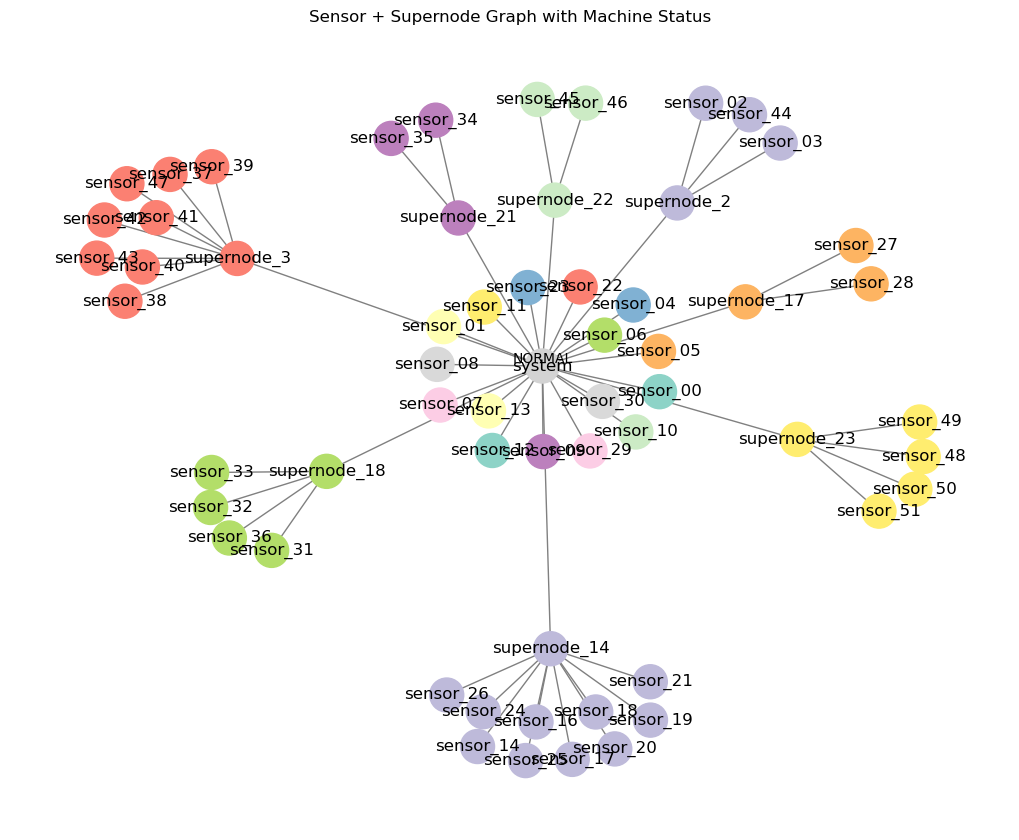

System Node:
{'machine_status': 'NORMAL'}

supernode_17 Info:
{'mean_value': np.float64(736.52725), 'mean_value_decimals': np.float64(3.5), 'mean_value_exp_weighted_mean_span10000': np.float64(723.6555077541332), 'mean_value_exp_weighted_std_span10000': np.float64(25.481261808412718), 'mean_value_zscore_span10000': np.float64(0.7574918396161687), 'num_sensors': 2}

Sensors connected to supernode_17:
sensor_28: {'value': np.float64(1002.495), 'value_decimals': np.float64(3.0), 'value_exp_weighted_mean_span10000': np.float64(999.7600538265755), 'value_exp_weighted_std_span10000': np.float64(34.94796117124157), 'value_zscore_span10000': np.float64(0.07825767460435146)}
sensor_27: {'value': np.float64(470.5595), 'value_decimals': np.float64(4.0), 'value_exp_weighted_mean_span10000': np.float64(447.5509616816909), 'value_exp_weighted_std_span10000': np.float64(16.014562445583863), 'value_zscore_span10000': np.float64(1.436726004627986)}


In [138]:
G_row = build_sensor_graph(df_sensor, sensor_clusters, color_map)
visualize_sensor_graph(G_row, color_map, df_sensor)


In [139]:
# Separate cycle IDs by status
normal_cycles = cycle_stats[cycle_stats['status'] == 'NORMAL']['CycleID'].tolist()
recovering_cycles = cycle_stats[cycle_stats['status'] == 'RECOVERING']['CycleID'].tolist()

# Helper function to split cycles by counts
def split_cycles(cycles):
    train = cycles[:4]
    test = cycles[4:6]
    holdout = cycles[6:]
    return train, test, holdout

# Split each status group
train_normal, test_normal, holdout_normal = split_cycles(normal_cycles)
train_recovering, test_recovering, holdout_recovering = split_cycles(recovering_cycles)

# Combine splits
train_cycles = train_normal + train_recovering
test_cycles = test_normal + test_recovering
holdout_cycles = holdout_normal + holdout_recovering

print("Train Cycles:", train_cycles)
print("Test Cycles:", test_cycles)
print("Holdout Cycles:", holdout_cycles)

Train Cycles: [0, 3, 6, 9, 2, 5, 8, 11]
Test Cycles: [12, 15, 14, 17]
Holdout Cycles: [18, 21, 20]


In [140]:
from torch_geometric.data import Data, DataLoader
import torch
import numpy as np

ModuleNotFoundError: No module named 'torch_geometric'

## Visualizations

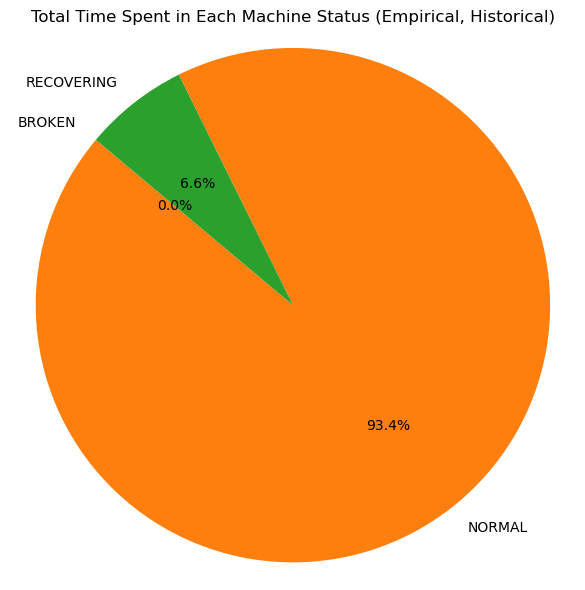

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cycle stats
cycle_stats = pd.read_pickle('cycle_stats.pkl')

# Group by status and sum durations
status_durations = cycle_stats.groupby('status')['count'].sum()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_durations, labels=status_durations.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Time Spent in Each Machine Status (Empirical, Historical)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()


In [16]:
import numpy as np

# Sort cycles
df = cycle_stats.sort_values('CycleID').reset_index(drop=True)

# Self transitions: same state repeats
self_df = df.copy()
self_df['next_status'] = self_df['status']
self_df['count'] = self_df['count'] - 1
self_df = self_df[self_df['count'] > 0]

# Next state transitions: different states
next_df = df.copy()
next_df['next_status'] = next_df['status'].shift(-1)
next_df['count'] = 1
next_df = next_df.dropna(subset=['next_status'])

# Combine both
transitions = pd.concat([self_df[['status','next_status','count']], next_df[['status','next_status','count']]])

# Get all unique states from status and next_status
states = sorted(set(transitions['status']).union(set(transitions['next_status'])))

# Group and sum counts
transition_matrix = transitions.groupby(['status','next_status'])['count'].sum().unstack(fill_value=0)

# Reindex rows and columns for consistent ordering
transition_matrix = transition_matrix.reindex(index=states, columns=states, fill_value=0)

print(transition_matrix)

# Convert counts to probabilities (rows sum to 1)
row_sums = transition_matrix.sum(axis=1).replace(0, 1)
transition_matrix = transition_matrix.div(row_sums, axis=0)

print("Transition matrix (probabilities):")
print(transition_matrix)

# Calculate steady state vector
# solve steady state: pi such that pi = pi * P, 
eigvals, eigvecs = np.linalg.eig(transition_matrix.T)

# Get eigenvector corresponding to eigenvalue 1
steady_vec = eigvecs[:, np.isclose(eigvals, 1)]

# Normalize steady state
steady_state = steady_vec[:, 0].real
steady_state /= steady_state.sum()

print(f"Steady state %: [{', '.join(f'{x:.3f}' for x in steady_state * 100)}]")


            BROKEN  NORMAL  RECOVERING
status                                
BROKEN           0       0           7
NORMAL           7  205828           0
RECOVERING       0       7       14470
Transition matrix (probabilities):
              BROKEN    NORMAL  RECOVERING
status                                    
BROKEN      0.000000  0.000000    1.000000
NORMAL      0.000034  0.999966    0.000000
RECOVERING  0.000000  0.000484    0.999516
Steady state %: [0.003, 93.426, 6.571]


### Observations

- 7 cycles of Normal to Broken
- 7 cycles of Recovering to Normal
- Long-term, the water pump is expected to operate in NORMAL machine status ~93% of the time, and 7% of the time it is in RECOVERING status.
    - 93% availability is **great** for typical manufacturing, but for a small village relying on a ***single*** pump, it can have serious consequences.
    - Traditionally, adding a second village water pump mitigates downtime risk when the primary fails; in a critical supply setting, where significant downtime can cost lives, relying on just one machine is not only risky, it’s a fundamental systemic design flaw.
    - If adding a backup is infeasible, then implementing predictive maintenance becomes critical to ensure a reliable water supply.